In [2]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'skimage'

In [ ]:
image_one = cv2.imread("/content/image_part_001.jpg")
image_two = cv2.imread("/content/image_part_002.jpg")

gray1 = cv2.cvtColor(image_one, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image_two, cv2.COLOR_BGR2GRAY)

In [ ]:
(score, diff) = structural_similarity(gray1, gray2, full=True)
diff = (diff*255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9153203351442917


In [ ]:
thresh = cv2.threshold(diff, 0, 128, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) [1]
cnts =cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

No of differences=  545


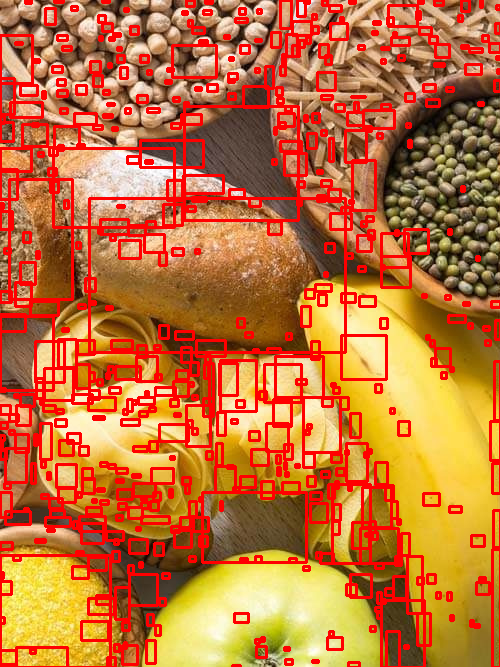

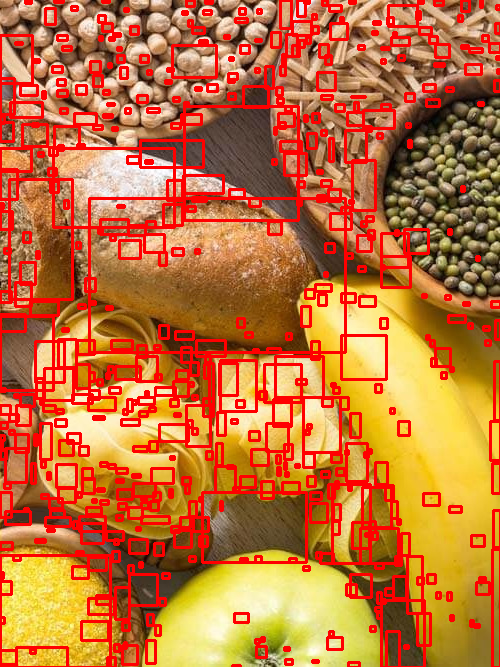

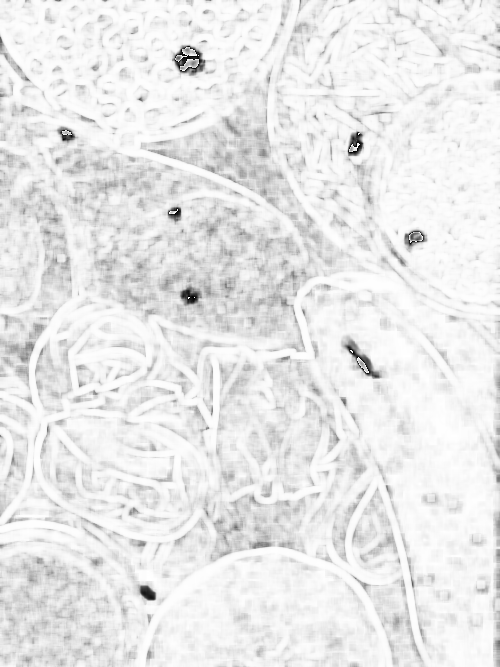

-1

In [ ]:
no_of_differences = 0
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  rect_area = w*h
  if rect_area > 10:
    no_of_differences += 1
    cv2.rectangle(image_one,(x,y),(x+w, y+h),(0,0,255), 2)
    cv2.rectangle(image_two,(x,y),(x+w, y+h),(0,0,255), 2)
print("No of differences= ", no_of_differences)
cv2_imshow(image_one)
cv2_imshow(image_two)
cv2_imshow(diff)
cv2.waitKey(0)
